#2.3 Classification case Studies
Deep learning are very good at classification tasks. In this chapter we are going to study two classification cases namely binary classification and multi class classification. If we only have two classes to classify then that is a binary classification problem. If we have more than two classes , then it is multi class classification.

## 2.3.1 Binary Classification

As a study of binary classification problem , we are going to use Wisconsin Breast cancer dataset. The dataset is the collection of measures of different parameters taken from the breast cells like shown in the figure below:

![alt text](https://www.oreilly.com/library/view/data-science-for/9781449374273/images/dsfb_0411.png.jpg)

    Figure: UCI ML Breast Cancer Wisconsin (Diagnostic)

 The dataset consists of two classes called Malignant ( which mean cancer) and Benign ( meaning no cancer). From the breast cell nucleaus  features were calculated which are related to this attributes of a cell nucleus:
 

1.   radius (mean of distances from center to points on the perimeter) 
2.   texture (standard deviation of gray-scale values) 
3.   perimeter 
4.   area
5.   smoothness (local variation in radius lengths) 
6.   compactness (perimeter^2 / area - 1.0) 
7.   concavity (severity of concave portions of the contour) 
8.   concave points (number of concave portions of the contour) 
9.   symmetry 
10. fractal dimension ("coastline approximation" - 1)


### 2.3.1.1 Data Preparation

The wisconsin dataset is hosted by sklearn so we can download the dataset from there.

In [0]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


We can check the classes of our dataset

In [4]:
print("Classes: ", list(data.target_names))


Classes:  ['malignant', 'benign']


We can also inspect total number features and their name.

In [6]:
print("features: ", list(data.feature_names))
print("Total features: ", len(data.feature_names) )

features:  ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Total features:  30


We have total 569 data. We wil use 80 % of the data as training data and rest as test data.

In [9]:
print("Total data",len(data.data))
X = data.data
Y = data.target

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

print("Total training data: ",len(X_train))
print("Total test data: ",len(X_test))

Total data 569
Total training data:  455
Total test data:  114


### 2.3.1.2 Building Deep learning Model
The first step of building a Deep Network in Keras is creating an instance of Sequential class. We then add the layers of our preference to get our final model. 

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 



  We create and architecture consisting 4 hidden layers made of dense layer. A dense layer is merely a layer where each hidden unit  is connected to each neuron in the next layer.  Our architecture will be very similar to the architecture given below
  
  ![alt text](https://www.mathworks.com/content/mathworks/www/en/discovery/deep-learning/_jcr_content/mainParsys/band_2123350969_copy_1983242569/mainParsys/columns_1635259577/1/image_2128876021_cop_1731669336.adapt.full.high.svg/1542368857897.svg)
  
      Fig: Deep neural network with dense layers
  
  In our first layer, we have input dimension of 30 as we have 30 features and the layer will have 16 hidden units. We will use relu activation. Similarly, our second layer has * hidden units and third layer has 4 hiddden unit . They will also use relu activation. Our final layer will have only one hidden layer and we will use sigmoid activation. The sigmoid activation function provide a result between 0 and 1 . We will classify the cell as malign if the output is less than 0.5 and benign if it is higher or equal to 0.5.

In [0]:
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

We can inspect the shape and total number of hidden units of our architecture by using summary function

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


After building our arvhitecture we need to compile it before training. Compiling model involves setting our optimizer, loss function and performance metrics. We will be using rmsprop optimizer , binary corss entropy as loss function and accuracy as performance measure of our model.

In [0]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


After compiling our model we can train it using fit function. While training our model we will use 75 % of our training data to train the model and rest for validation. We will train  our model for 15 epochs and use bactch size of 2.

In [0]:
model.fit(X_train, Y_train, validation_split=0.25, epochs=15, batch_size=2, verbose=1)


Train on 341 samples, validate on 114 samples
Epoch 1/15
341/341 [==============================] - 1s 4ms/step - loss: 0.6827 - acc: 0.5718 - val_loss: 0.6649 - val_acc: 0.4298
Epoch 2/15
341/341 [==============================] - 1s 2ms/step - loss: 0.6505 - acc: 0.5073 - val_loss: 0.6275 - val_acc: 0.5614
Epoch 3/15
341/341 [==============================] - 1s 2ms/step - loss: 0.5901 - acc: 0.6774 - val_loss: 0.5655 - val_acc: 0.8860
Epoch 4/15
341/341 [==============================] - 1s 2ms/step - loss: 0.4811 - acc: 0.8768 - val_loss: 0.4415 - val_acc: 0.8246
Epoch 5/15
341/341 [==============================] - 1s 2ms/step - loss: 0.3218 - acc: 0.8856 - val_loss: 0.3979 - val_acc: 0.8421
Epoch 6/15
341/341 [==============================] - 1s 2ms/step - loss: 0.2798 - acc: 0.8827 - val_loss: 0.3105 - val_acc: 0.8596
Epoch 7/15
341/341 [==============================] - 1s 2ms/step - loss: 0.2482 - acc: 0.9062 - val_loss: 0.2963 - val_acc: 0.8684
Epoch 8/15
341/341 [==========

Like we discuss above, we will consider the output as malign ( 0) if its value is less than 0.5 and benign (1) if it is equal or greater than 0.5.

In [0]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

We will find how our model has performed by using our test data. We will use confusion matrix to find our performance result. We can find that our model has achieved 92.98% accuracy in our test data.


In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[34  5]
 [ 3 72]]
Accuracy: 92.98245614035088%


To understand confusion matrix better we will plot confusion matrix of performance of our model.
From the plot we can observe that among 39 samples of class 0 (malign), 34 were correctly predicted while 5 were miss classified as class 1. We can also observe the 3 of class 1 (benign) were classified as malign and 72 of them were miss classified.

So, we have :

total samples = 34+5+3+72 = 114

total right classification = 34 + 72 = 106

So, accuracy = 106/114 = 92.98%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

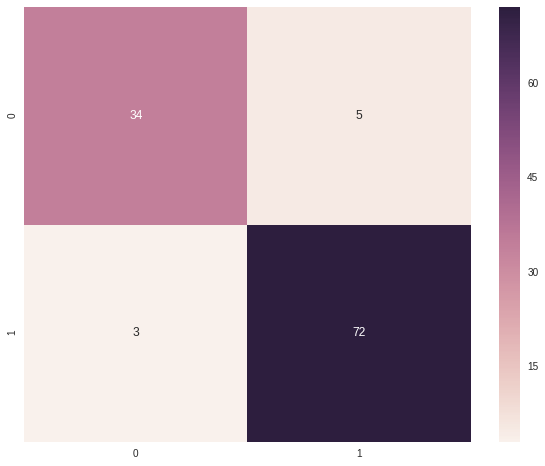

In [0]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d");

## 2.3.2 Multi class classification

If we have more than 2 classes to clasify then such problem is caled multi class classification problem. For this case we will be using iris dataset. The dataset  was used by R.A. Fishers for his 1936 classic paper. It consists multiple measurements of different attributes of three different kind of iris namely **Iris Veriscolor**, **Iris Setosa** and **Iris Virginica**.


![alt text](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

      Fig: Different types of Iris

The attributes measured are:


1.   Sepa lLength in Cm
2.   Sepal Width in Cm
3.   Petal in Length Cm
4.   Petal Width in Cm



### 2.3.2.1 Data Preparation
Sklearn has hosted the iris data set so we can easily get it from there and use it instantly.

In [0]:
from sklearn.datasets import load_iris
data = load_iris()

The three classes of the ata sets can be inspected as:

In [12]:
print("Classes:",data.target_names)

Classes: ['setosa' 'versicolor' 'virginica']


Similarly, we can also inspect the name of features of our data

In [13]:
print("Feature names:",data.feature_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The class label of our model can be inspected as:

In [14]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### One hot Encoding

The problem of representing our label in the format given above is that it makes the performance of machine learning algorithm poor. The problem with such representation is that our machine learning algorithms tends to have higher preference for higher valued classes. So we use one hot encoding to represent our classes which helps the model perform better.

In one hot encoding, the above representation is converted into:

1 => [1, 0, 0]

2 => [0, 1, 0]

3 => [0, 0, 1]

We can use np_utils function from Keras to convert our labels into one hot encoding.

In [18]:
from keras.utils import np_utils

Y = np_utils.to_categorical(data.target)
print("One hot encoding: ",Y[0])

One hot encoding:  [1. 0. 0.]


We will use 80% of our data for training purpose and rest for testing.

In [19]:
from sklearn.model_selection import train_test_split
X = data.data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

print("Total training samples: ", len(X_train))
print("Total test samples: ", len(X_test))

Total training samples:  120
Total test samples:  30


### 2.3.2.1 Building Deep Learning Model

Building deep earning model for multi class problem is very similar to building binary class model. We will first create an instance of Sequential model and add multiple dense layers. For iris clasification model we will be adding five dense layer . Each layer will be followed by relu activation function. The only difference in multi-class classification is in last layer. The number of hidden units should be equal to number of classes and the activation should be softmax.  The softmax function will give probability of given sample falling in particular class. For example, in the figure given below, the probability of given sample to be class 1 is 46%, probability for class 2 is 34% and class 3 is 20%. The final predicted class will be class with highest probability.

![alt text](https://cdn-images-1.medium.com/max/1200/0*2r10e7gw1jzOsHhC.png)

                   Fig: Final layer and softmax result


In addition, we will be using categorical cross entropy instead od binary cross entropy while compiling our model.


In [0]:
from keras.models import Sequential 
from keras.layers import Dense 

number_of_features = len(data.feature_names)
number_of_classes = len(data.target_names)

model = Sequential()
model.add(Dense(8, input_dim = number_of_features , activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(number_of_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )



The fit function used to train the model return values regarding performance of the model after each epoch. We will collect these statistics as history to visualize how our model performed in each epochs. We train this model for 50 epochs using 80% of training data for training and rest for validation. From the plot we can observe that training and validation accuracy increased rapidly  till 10 epochs and then steadily fluctuates. Similar phenomenon can be obseved for the loss function. From the visualization we can consider that stopping the training after 10 or 15 epochs would be better as training further hasn't resulted better performance. This can be achieved using a technique called Early stopping which we will discuss in later chapter.

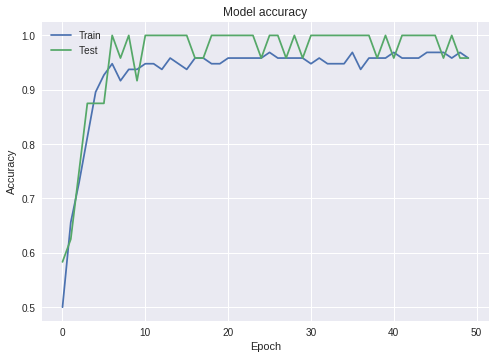

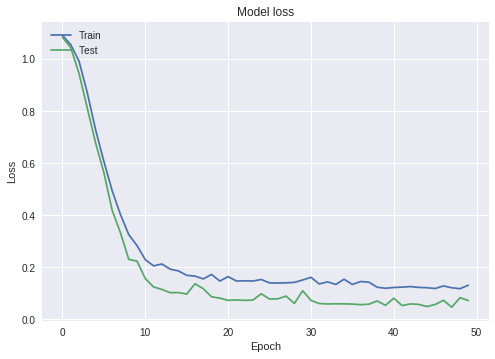

In [0]:
import matplotlib.pyplot as plt

history = model.fit(X_train, Y_train,validation_split=0.2, epochs = 50, batch_size = 2,verbose=0)


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

We can evaluate performance of our model in our test data. We can find that our model has achieved 96.67 % accuracy in our test data.

In [0]:
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

30/30 [==============================] - 0s 143us/step

acc: 96.67%
